Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


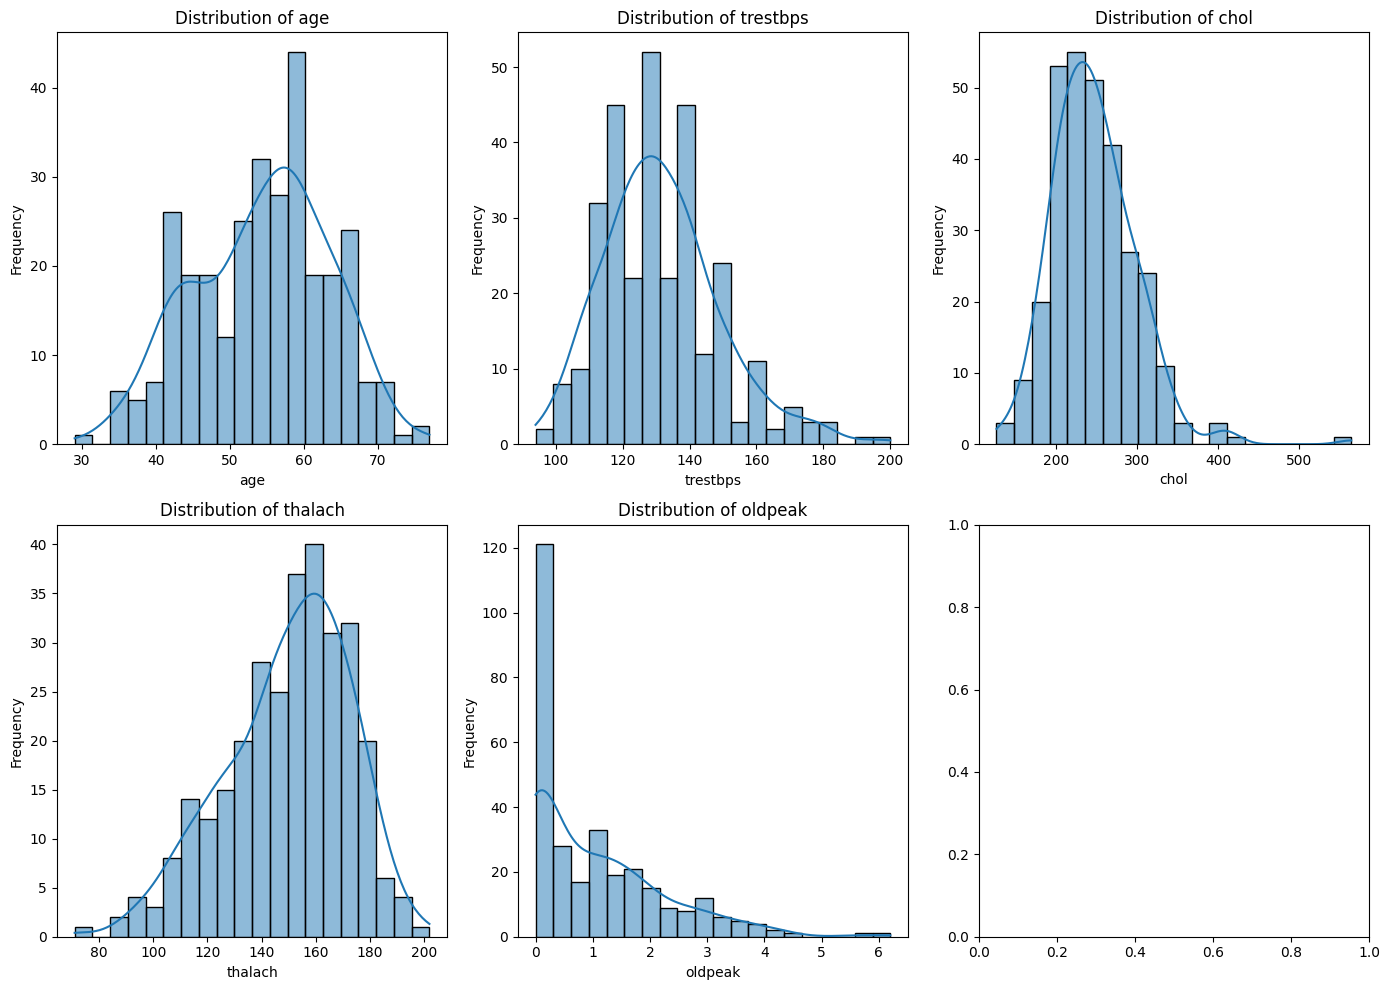


Skewness of numerical columns:
age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64


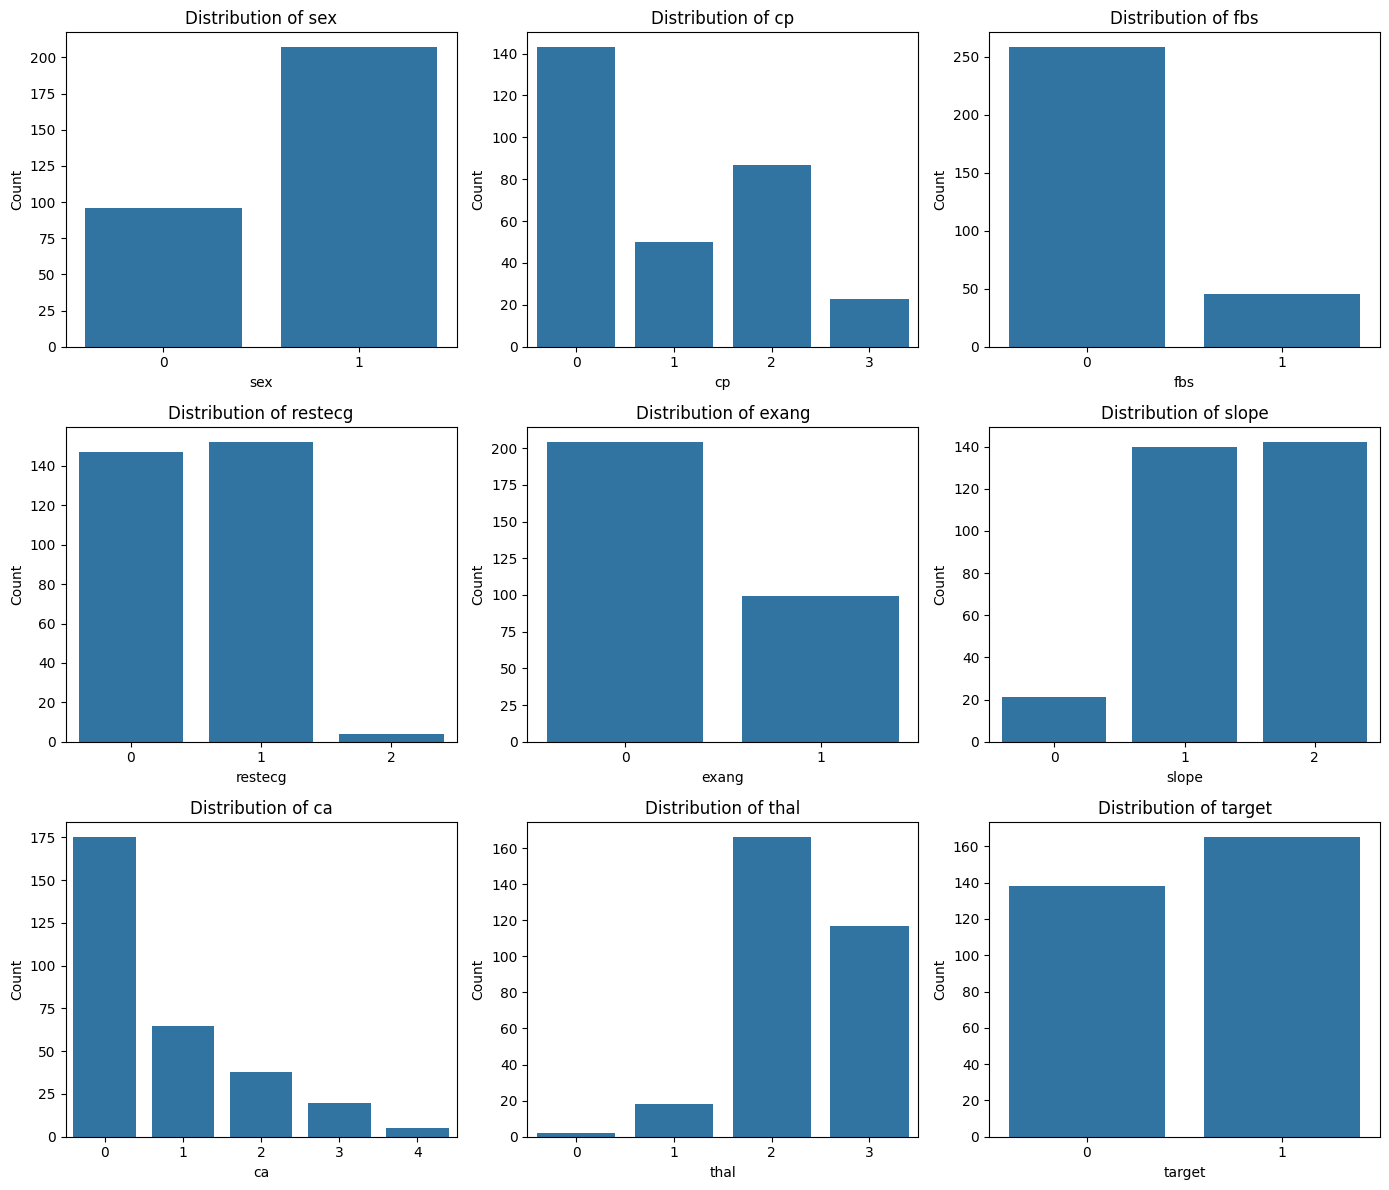

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/dataset/heart.csv')

# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# List of numerical columns for analysis (updated according to your dataset)
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot distributions of numerical columns
num_cols = len(numerical_columns)
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot (since we have 5 numerical columns)
fig.tight_layout()
plt.savefig('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/EDA /Numerical_data.png')
plt.show()

# Analyzing skewness
skewness = df[numerical_columns].skew()
print("\nSkewness of numerical columns:")
print(skewness)

# Categorical columns analysis
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Plot count plots for categorical data
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove empty subplot (since we have 9 categorical columns)
fig.tight_layout()
plt.savefig('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/EDA /Categorical_data.png')
plt.show()


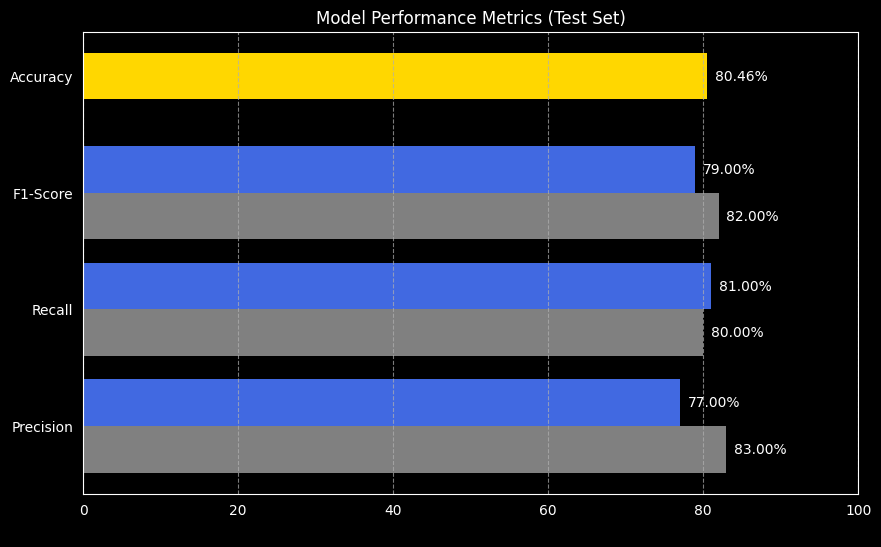

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Performance metrics from provided data
metrics = {
    "Accuracy": (25 * 0.8 + 21 * 0.81) / (25 + 21) * 100,  # Weighted average accuracy
    "Precision": {"Heart Disease": 83, "No Heart Disease": 77},
    "Recall": {"Heart Disease": 80, "No Heart Disease": 81},
    "F1-Score": {"Heart Disease": 82, "No Heart Disease": 79}
}

categories = list(metrics.keys())[1:]  # Exclude Accuracy
labels = ["Heart Disease", "No Heart Disease"]
values = np.array([[metrics[cat][label] for label in labels] for cat in categories])

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(categories))

# Plot bars without labels in the legend
ax.barh(x - bar_width / 2, values[:, 0], bar_width, color='gray')
ax.barh(x + bar_width / 2, values[:, 1], bar_width, color='royalblue')

# Accuracy bar
ax.barh(len(categories), metrics["Accuracy"], bar_width, color='gold')

# Add text labels at the end of each bar
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', va='center', fontsize=10, color='white')

# Formatting
ax.set_yticks(np.arange(len(categories) + 1))
ax.set_yticklabels(categories + ["Accuracy"])
ax.set_xlabel("Value")
ax.set_title("Model Performance Metrics (Test Set)")
ax.set_xlim(0, 100)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Dark mode styling
plt.gca().set_facecolor("black")
plt.gcf().set_facecolor("black")
plt.xticks(color='white')
plt.yticks(color='white')
plt.title("Model Performance Metrics (Test Set)", color='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

plt.show()


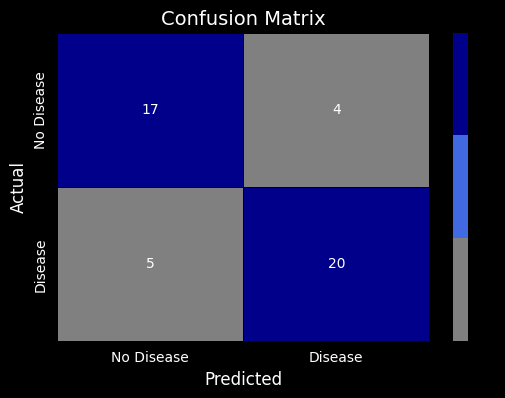

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrix values
conf_matrix = np.array([[17, 4], 
                        [5, 20]])

# Define class labels
classes = ["No Disease", "Disease"]

# Create heatmap with custom colors
plt.figure(figsize=(6, 4))
cmap = sns.color_palette(["gray", "royalblue", "darkblue"])  # Custom color scheme

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes, linewidths=0.5, linecolor="black")

# Labels and title
plt.xlabel("Predicted", fontsize=12, color='white')
plt.ylabel("Actual", fontsize=12, color='white')
plt.title("Confusion Matrix", fontsize=14, color='white')

# Dark mode styling
plt.gca().set_facecolor("black")
plt.gcf().set_facecolor("black")
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


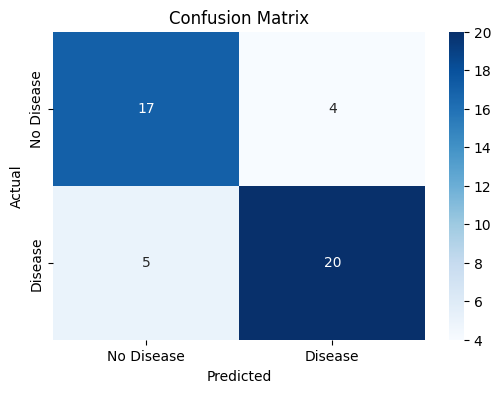

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define confusion matrix values
conf_matrix = np.array([[17, 4], 
                        [5, 20]])

# Define class labels
classes = ["No Disease", "Disease"]

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show plot
plt.show()


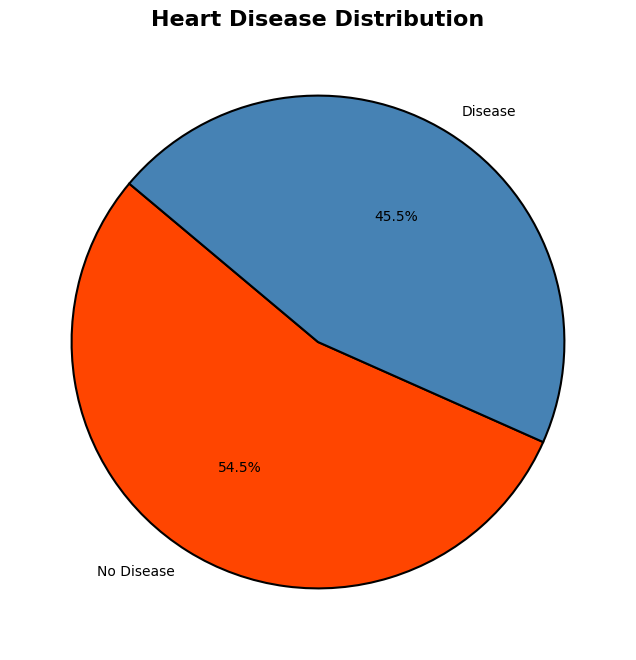

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/dataset/heart.csv')

# Count occurrences of each class
disease_counts = df['target'].value_counts()

# Define labels and colors
labels = ['No Disease', 'Disease']
colors = ['#FF4500', '#4682B4']  # Orangered & Steel Blue

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(disease_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Title
plt.title('Heart Disease Distribution', fontsize=16, fontweight='bold')

# Save and show the plot
plt.savefig('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/EDA /Heart_Disease_Pie.png', dpi=300, bbox_inches='tight')
plt.show()


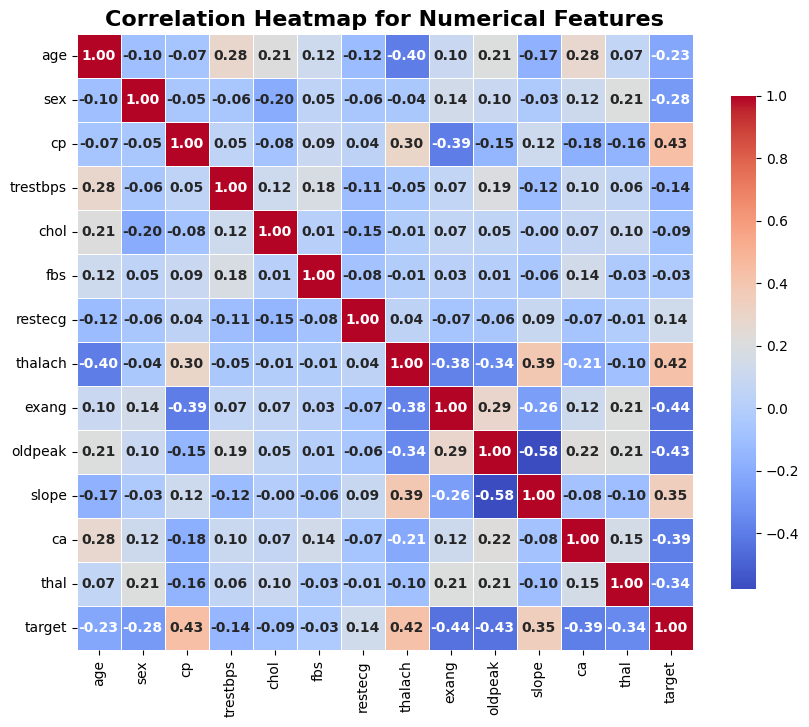

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/dataset/heart.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure and size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, square=True, annot_kws={'size': 10, 'weight': 'bold'})

# Title
plt.title('Correlation Heatmap for Numerical Features', fontsize=16, fontweight='bold')

# Save and show the plot
plt.savefig('/home/predator/Desktop/college_project/Multiple-Disease-Prediction/EDA /Correlation_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
